In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'

In [14]:
name_df = pd.read_csv("https://datasets.imdbws.com/name.basics.tsv.gz", sep="\t")
name_df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0057345,tt0056404"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0060827,tt0050986"
...,...,...,...,...,...,...
11327873,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt11657662,tt2455546"
11327874,nm9993716,Essias Loberg,\N,\N,NaN,\N
11327875,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
11327876,nm9993718,Aayush Nair,\N,\N,cinematographer,\N


In [6]:
akas_df = pd.read_csv("https://datasets.imdbws.com/title.akas.tsv.gz", sep="\t", dtype={"titleId": "string", "ordering": str, "title ": "string", "region ": "string", 
"language ": "string", "types ": str, "attributes ": str, "isOriginalTitle": str})
akas_df

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
29532538,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
29532539,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
29532540,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
29532541,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [7]:
basics_df = pd.read_csv("https://datasets.imdbws.com/title.basics.tsv.gz", sep="\t")
basics_df

C:\Users\Berenger\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8333391,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8333392,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8333393,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8333394,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [118]:
crew_df = pd.read_csv("https://datasets.imdbws.com/title.crew.tsv.gz", sep="\t", low_memory=False)
crew_df

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N
...,...,...,...
8370962,tt9916848,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
8370963,tt9916850,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
8370964,tt9916852,"nm5519454,nm5519375","nm6182221,nm1628284,nm2921377"
8370965,tt9916856,nm10538645,nm6951431


In [126]:
episode_df = pd.read_csv("https://datasets.imdbws.com/title.episode.tsv.gz", sep="\t", low_memory=False)
episode_df


,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tt15180956,1,2
1,tt0020829,tt15180956,1,1
2,tt0021166,tt15180956,1,3
3,tt0021612,tt15180956,2,2
4,tt0021655,tt15180956,2,5
...,...,...,...,...
6152197,tt9916846,tt1289683,3,18
6152198,tt9916848,tt1289683,3,17
6152199,tt9916850,tt1289683,3,19
6152200,tt9916852,tt1289683,3,20


In [2]:
principals_df = pd.read_csv("https://datasets.imdbws.com/title.principals.tsv.gz", sep="\t")
principals_df

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
47310368,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]"
47310369,tt9916880,5,nm0996406,director,principal director,\N
47310370,tt9916880,6,nm1482639,writer,\N,\N
47310371,tt9916880,7,nm2586970,writer,books,\N


In [117]:
ratings_df = pd.read_csv("https://datasets.imdbws.com/title.ratings.tsv.gz", sep="\t", low_memory=False)
ratings_df

,tconst,averageRating,numVotes
0,tt0000001,5.7,1826
1,tt0000002,6.0,234
2,tt0000003,6.5,1583
3,tt0000004,6.1,152
4,tt0000005,6.2,2405
...,...,...,...
1195680,tt9916682,5.6,5
1195681,tt9916690,6.6,5
1195682,tt9916720,5.3,141
1195683,tt9916766,7.1,17


In [4]:
#Code to keep only "short", "movie" and "tvMovie"
basics_df2 = basics_df[(basics_df['titleType'] == 'movie') | (basics_df['titleType'] == 'tvMovie')]

#code to remove all lines with a startYear older than 1960
basics_df3 = basics_df2[basics_df2['startYear'] > str(1960)]

#code to remove all lines with a missing startYear
basics_df4 = basics_df3[basics_df3['startYear'] != '\\N']

#code to remove all lines with a missing genres
basics_df5 = basics_df4[basics_df4['genres'] != '\\N']
basics_df5

NameError: name 'basics_df' is not defined

In [183]:
basics_df6 = basics_df5.set_index('tconst')
ratings_df2 = ratings_df.set_index('tconst')
principals_df2 = principals_df.set_index('tconst')

In [189]:
crew_df2 = crew_df.set_index('tconst')

In [199]:
name_df2 = name_df.set_index('nconst')
name_df2

,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
nconst,,,,,
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0072308,tt0050419"
nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382"
nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0056404,tt0054452,tt0049189"
nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0072562,tt0078723,tt0080455"
nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"
...,...,...,...,...,...
nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt11657662,tt2455546"
nm9993716,Essias Loberg,\N,\N,NaN,\N
nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744


In [195]:
#akas_df2 = akas_df[(akas_df['region'] == 'FR') & (akas_df['title'] == 'Star Wars : Épisode VII - Le Réveil de la Force')]
#akas_df2 = akas_df[akas_df['region'] == 'FR']
#akas_df2 = akas_df[(akas_df['title'] == 'Mr. & Mrs. Smith') & (akas_df['region'] == 'FR')]
#akas_df2 = akas_df[akas_df['titleId'] == 'tt0000001']
#akas_df2 = akas_df[akas_df['title'] == 'Mr. & Mrs. Smith']

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...
47337681,tt9916880,4,nm10535738,actress,\N,"[""Horrid Henry""]"
47337682,tt9916880,5,nm0996406,director,principal director,\N
47337683,tt9916880,6,nm1482639,writer,\N,\N
47337684,tt9916880,7,nm2586970,writer,books,\N


,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama
tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance"
tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical"
tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,\N,56,"Action,Adventure,Western"
tt0022064,movie,Lebbra bianca,Lebbra bianca,0,1951,\N,100,Drama
...,...,...,...,...,...,...,...,...
tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Drama,History"
tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123,Drama
tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,\N,57,Documentary


In [185]:
basics_df7 = pd.merge(basics_df6, ratings_df2, how='inner', left_index=True, right_index=True)

In [186]:
basics_df7

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
tconst,,,,,,,,,,
tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama,6.9,29
tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance",6.0,25
tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical",5.6,19
tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,\N,56,"Action,Adventure,Western",6.0,42
tt0022064,movie,Lebbra bianca,Lebbra bianca,0,1951,\N,100,Drama,5.3,53
...,...,...,...,...,...,...,...,...,...,...
tt9916170,movie,The Rehearsal,O Ensaio,0,2019,\N,51,Drama,7.2,5
tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",3.5,225
tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1194


In [190]:
basics_df8 = pd.merge(basics_df7, crew_df2, how='inner', left_index=True, right_index=True)

In [191]:
basics_df8

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
tconst,,,,,,,,,,,,
tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama,6.9,29,nm0241273,nm0217526
tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance",6.0,25,nm0529960,"nm0529960,nm1597742"
tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical",5.6,19,nm0136068,\N
tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,\N,56,"Action,Adventure,Western",6.0,42,nm0289297,nm0119378
tt0022064,movie,Lebbra bianca,Lebbra bianca,0,1951,\N,100,Drama,5.3,53,nm0871077,"nm0871077,nm0872689"
...,...,...,...,...,...,...,...,...,...,...,...,...
tt9916170,movie,The Rehearsal,O Ensaio,0,2019,\N,51,Drama,7.2,5,nm5412267,"nm5412267,nm6743460,nm3245789"
tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",3.5,225,nm7308376,nm7308376
tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1194,nm1480867,"nm1480867,nm10538402"


In [197]:
basics_df9 = basics_df8.set_index('directors')

In [198]:
basics_df9

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,writers
directors,,,,,,,,,,,
nm0241273,movie,Spanish Fiesta,La fête espagnole,0,2019,\N,67,Drama,6.9,29,nm0217526
nm0529960,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance",6.0,25,"nm0529960,nm1597742"
nm0136068,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical",5.6,19,\N
nm0289297,movie,Arizona Territory,Arizona Territory,0,1950,\N,56,"Action,Adventure,Western",6.0,42,nm0119378
nm0871077,movie,Lebbra bianca,Lebbra bianca,0,1951,\N,100,Drama,5.3,53,"nm0871077,nm0872689"
...,...,...,...,...,...,...,...,...,...,...,...
nm5412267,movie,The Rehearsal,O Ensaio,0,2019,\N,51,Drama,7.2,5,"nm5412267,nm6743460,nm3245789"
nm7308376,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",3.5,225,nm7308376
nm1480867,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1194,"nm1480867,nm10538402"


In [202]:
name_df2.index.names = ['directors']
name_df2


,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
directors,,,,,
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0072308,tt0050419"
nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382"
nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0057345,tt0056404,tt0054452,tt0049189"
nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0077975,tt0072562,tt0078723,tt0080455"
nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"
...,...,...,...,...,...
nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt11657662,tt2455546"
nm9993716,Essias Loberg,\N,\N,NaN,\N
nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744


In [203]:
basics_df10 = pd.merge(basics_df9, name_df2, how='inner', left_index=True, right_index=True)
basics_df10

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,writers,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
directors,,,,,,,,,,,,,,,,
nm0000005,movie,It Rains on Our Love,Det regnar på vår kärlek,0,1946,\N,95,"Drama,Romance",6.6,1441,"nm0102602,nm0340471,nm0000005",Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"
nm0000005,movie,Crisis,Kris,0,1946,\N,93,"Drama,Romance",6.4,2891,"nm0000005,nm0279027",Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"
nm0000005,movie,A Ship to India,Skepp till India land,0,1947,\N,98,Drama,6.4,1710,"nm0000005,nm0845496",Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"
nm0000005,movie,Port of Call,Hamnstad,0,1948,\N,100,Drama,6.6,2337,"nm0000005,nm0529508",Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"
nm0000005,movie,Music in Darkness,Musik i mörker,0,1948,\N,87,Drama,6.4,1272,nm0249647,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0060827"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nm9991166,movie,Public Figure,Public Figure,0,2019,\N,66,Documentary,4.3,84,\N,Brian Corso,\N,\N,"producer,director,executive","tt10047438,tt10832454,tt12803088,tt8738176"
nm9992757,movie,Star-Crossed: The Film,Star-Crossed: The Film,0,2021,\N,48,Music,6.5,146,\N,Bardia Zeinali,\N,\N,director,"tt8727172,tt11416506,tt15285682,tt9227188"
nm9992763,movie,"Sí, Mi Amor","Sí mi amor, la película",0,2020,\N,107,Comedy,4.1,147,"nm8854901,nm9992763",Pedro Flores Maldonado,\N,\N,"director,cinematographer","tt8742174,tt11734696"


In [210]:
basics_df10.drop('knownForTitles', axis=1, inplace=True)
basics_df10

,titleType,primaryTitle,originalTitle,isAdult,startYear,genres,averageRating,numVotes,primaryName
directors,,,,,,,,,
nm0000005,movie,It Rains on Our Love,Det regnar på vår kärlek,0,1946,"Drama,Romance",6.6,1441,Ingmar Bergman
nm0000005,movie,Crisis,Kris,0,1946,"Drama,Romance",6.4,2891,Ingmar Bergman
nm0000005,movie,A Ship to India,Skepp till India land,0,1947,Drama,6.4,1710,Ingmar Bergman
nm0000005,movie,Port of Call,Hamnstad,0,1948,Drama,6.6,2337,Ingmar Bergman
nm0000005,movie,Music in Darkness,Musik i mörker,0,1948,Drama,6.4,1272,Ingmar Bergman
...,...,...,...,...,...,...,...,...,...
nm9991166,movie,Public Figure,Public Figure,0,2019,Documentary,4.3,84,Brian Corso
nm9992757,movie,Star-Crossed: The Film,Star-Crossed: The Film,0,2021,Music,6.5,146,Bardia Zeinali
nm9992763,movie,"Sí, Mi Amor","Sí mi amor, la película",0,2020,Comedy,4.1,147,Pedro Flores Maldonado


In [187]:
akas_df2 = akas_df[akas_df['language'] == 'fr']

# <span style="color:green">Quels sont les pays qui produisent le plus de films ?</span> 

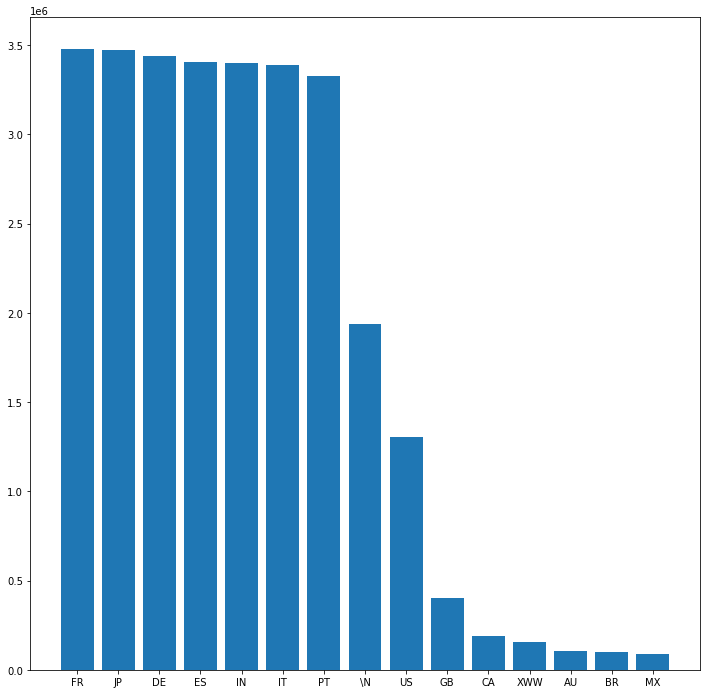

In [77]:
movie_By_Region2 = akas_df["region"].value_counts().reset_index().head(15)

fig, ax = plt.subplots(figsize = (12,12))

plt.bar(movie_By_Region2['index'], movie_By_Region2['region'])
plt.show()

# <span style="color:green">Quels sont les acteurs les plus présents ?</span> 

In [3]:
# Quels sont les acteurs les plus présents ?
# étape 1 : nettoyage de la data base

principals_df2 = principals_df[principals_df['category'].str.contains('actor|actress')]
principals_df3 = principals_df2[principals_df2['characters'] != '\\N']
principals_df4 = principals_df3[principals_df3['characters'] != 'Narrator']
principals_df5 = principals_df4[principals_df4['characters'] != 'Various']
principals_df6 = principals_df5[principals_df5['characters'] != 'Various Characters']
principals_df7 = principals_df6[principals_df6['characters'] != 'Additional Voices']
principals_df7.head(5)

,tconst,ordering,nconst,category,job,characters
11,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]"
12,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]"
21,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]"
24,tt0000009,1,nm0063086,actress,\N,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
25,tt0000009,2,nm0183823,actor,\N,"[""Mr. Hamilton""]"
...,...,...,...,...,...,...
47310360,tt9916856,4,nm10538647,actress,\N,"[""Kathi""]"
47310365,tt9916880,1,nm1483166,actor,\N,"[""Rude Ralph"",""Mischievous Mike"",""Jolly Josh""]"
47310366,tt9916880,2,nm0254176,actress,\N,"[""Moody Margaret""]"
47310367,tt9916880,3,nm0286175,actor,\N,"[""Dad"",""Aerobic Al"",""Nasty Nicola""]"


In [5]:
# Quels sont les acteurs les plus présents ?
# étape 2 : set index puis merge
# set index on tconst for basics and principal table
basics_df2 = basics_df.set_index('tconst')
principals_df8 = principals_df7.set_index('tconst')
# Merge de la table principals et basics afin de filtrer uniquement sur les movies et les shorts
merge_basics_principals = pd.merge(basics_df2, principals_df8, how='inner', left_index=True, right_index=True)
merge_basics_principals




nm0746709     5627
nm10117174    5606
nm0387617     5030
nm10120013    4506
nm0282535     4471
              ... 
nm12420764       1
nm6609693        1
nm12420770       1
nm12420796       1
nm10538647       1
Name: nconst, Length: 1733568, dtype: int64

In [ ]:
# Quels sont les acteurs les plus présents ?
# étape 3 : Nettoyage pour garder uniquement les titleType movie et short
merge_basics_principals2 = merge_basics_principals[(merge_basics_principals['titleType'] == 'movie') | (merge_basics_principals['titleType'] == 'short')]
merge_basics_principals2.reset_index()

In [ ]:
# Quels sont les acteurs les plus présents ?
# étape 4 : set index puis merge
# set index on nconst for Database name and Database merge_basics_principals2 to prepare a merge
name_df2 = name_df.set_index('nconst')
merge_basics_principals3 = merge_basics_principals2.set_index('nconst')
# merge to link first name with nconst
merge_basics_principals4 = pd.merge(name_df2, merge_basics_principals3, how='inner', left_index=True, right_index=True)
merge_basics_principals4.head(5)


In [49]:
# Quels sont les acteurs les plus présents ?
# étape 5 : Nettoyage pour retirer les oeuvres très courtes comme les cartoons de quelques minutes pour lesquelles les acteurs font seulement les voix
merge_basics_principals5 = merge_basics_principals4[merge_basics_principals4['runtimeMinutes'] != '\\N']
merge_basics_principals6 = merge_basics_principals5.astype({"runtimeMinutes": int})
merge_basics_principals7 = merge_basics_principals6[merge_basics_principals6['runtimeMinutes'] > 20]
merge_basics_principals7.head(10)

,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,category,job,characters
nconst,,,,,,,,,,,,,,,,,
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137",movie,The Gay Divorcee,The Gay Divorcee,0,1934,\N,107,"Comedy,Musical,Romance",1,actor,\N,"[""Guy Holden""]"
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137",movie,Roberta,Roberta,0,1935,\N,106,"Comedy,Musical,Romance",2,actor,\N,"[""Huck Haines""]"
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137",movie,Top Hat,Top Hat,0,1935,\N,101,"Comedy,Musical,Romance",1,actor,\N,"[""Jerry Travers""]"
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137",movie,Follow the Fleet,Follow the Fleet,0,1936,\N,110,"Comedy,Musical,Romance",1,actor,\N,"[""Bake Baker""]"
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137",movie,Swing Time,Swing Time,0,1936,\N,103,"Comedy,Musical,Romance",1,actor,\N,"[""Lucky Garnett""]"
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137",movie,A Damsel in Distress,A Damsel in Distress,0,1937,\N,101,"Comedy,Music,Romance",1,actor,\N,"[""Jerry Halliday""]"
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137",movie,Shall We Dance,Shall We Dance,0,1937,\N,109,"Comedy,Musical,Romance",1,actor,\N,"[""Peter P. Peters aka Petrov""]"
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137",movie,Carefree,Carefree,0,1938,\N,83,"Comedy,Musical,Romance",1,actor,\N,"[""Tony Flagg""]"
nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0072308,tt0053137",movie,The Story of Vernon and Irene Castle,The Story of Vernon and Irene Castle,0,1939,\N,93,"Biography,Drama,Musical",1,actor,\N,"[""Vernon Castle""]"


In [51]:
# Quels sont les acteurs les plus présents ?
# étape 6 : Value_counts pour trouver les acteurs les plus présents
merge_basics_principals8 = merge_basics_principals7['primaryName'].value_counts()
merge_basics_principals8.head(20)

Mohanlal              236
Eric Roberts          227
Mammootty             224
Cüneyt Arkin          219
Raymond Hatton        202
Mithun Chakraborty    178
Seiji Nakamitsu       159
Amitabh Bachchan      158
Charles Starrett      157
Dharmendra            150
Johnny Mack Brown     150
Gérard Depardieu      148
Jack Holt             146
Jamie Gillis          145
Buck Jones            143
Ashok Kumar           142
Anupam Kher           141
John Wayne            140
Michael Madsen        138
Bob Steele            131
Name: primaryName, dtype: int64

In [1]:
#quelques tests

#name_df6.loc[name_df6['primaryName'] == "Nikita"]

#name_df6.loc[name_df6['primaryName'] == "Brad Pitt"]

#principals_df.loc[(principals_df['nconst'] == "nm0000093") & (principals_df['category'] == "actor")]

#principals_df[principals_df['category'].str.contains('actor|actress')]
#principals_df['nconst'].value_counts()

#name_df.loc[name_df['nconst'] == "nm10120013"]

#principals_df2 = principals_df[principals_df['category'].str.contains('actor|actress')]

#principals_df2['nconst'].value_counts()

#principals_df.loc[principals_df['nconst'] == "nm0000093"]

# name_df6['numberOfKnownForTitles'] = name_df6['knownForTitles'].str.count("tt")
# name_df6.sort_values(by=['numberOfKnownForTitles'], ascending=False).head(15)

# name_df2 = name_df.dropna(axis=0)
# name_df3 = name_df2[name_df2['primaryProfession'] != '\\N']
# name_df4 = name_df3[name_df3['birthYear'] != '\\N']
# name_df5 = name_df4[name_df4['knownForTitles'] != '\\N']
# name_df6 = name_df5[name_df5['primaryProfession'].str.contains('actor|actress')]
# name_df6

In [6]:
principals_df8 = principals_df7['nconst'].value_counts()

In [16]:
principals_df9 = principals_df8[(np.abs(stats.zscore(principals_df8)) < 3).all(axis=1)]

ValueError: No axis named 1 for object type Series

In [10]:
principals_df3.loc[principals_df3['nconst'] == "nm0746709"].tail(60)

,tconst,ordering,nconst,category,job,characters
46714787,tt9730892,9,nm0746709,actress,\N,"[""Nurse Carolee Simpson Aldrich""]"
46714797,tt9730896,7,nm0746709,actress,\N,"[""Nurse Carolee Simpson Aldrich""]"
46714825,tt9730908,8,nm0746709,actress,\N,"[""Nurse Carolee Simpson Aldrich""]"
46714839,tt9730914,8,nm0746709,actress,\N,"[""Nurse Carolee Simpson Aldrich""]"
46714854,tt9730920,9,nm0746709,actress,\N,"[""Nurse Carolee Simpson Aldrich""]"
46714864,tt9730922,9,nm0746709,actress,\N,"[""Nurse Carolee Simpson Aldrich""]"
46714889,tt9730930,9,nm0746709,actress,\N,"[""Nurse Carolee Simpson Aldrich""]"
46714902,tt9730946,9,nm0746709,actress,\N,"[""Nurse Carolee Simpson Aldrich""]"
46714914,tt9730956,9,nm0746709,actress,\N,"[""Nurse Carolee Simpson Aldrich""]"
46714953,tt9730968,8,nm0746709,actress,\N,"[""Nurse Carolee Simpson Aldrich""]"


In [12]:
principals_df3['characters'].value_counts().head(50)

["Narrator"]              107494
["Various"]                40251
["Various Characters"]     29493
["Additional Voices"]      25526
["Host"]                   18654
["Alex"]                   13755
["Various Roles"]          12726
["Mother"]                 12612
["Dancer"]                 12260
["David"]                  12098
["Laura"]                  11973
["Sam"]                    11957
["Sarah"]                  11039
["John"]                   11006
["Man"]                    10833
["James"]                  10772
["Announcer"]              10655
["Lisa"]                   10648
["Tom"]                    10078
["Anna"]                    9915
["Daniel"]                  9627
["Jack"]                    9609
["Woman"]                   9336
["Father"]                  9294
["Mike"]                    9133
["Maria"]                   9012
["Girl"]                    8784
["Michael"]                 8392
["Max"]                     8340
["Paul"]                    8274
["Alice"] 